In [10]:
import nltk
import numpy as np
import os,gc,holidays,datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [11]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [12]:
airports = pd.read_csv('../AML_group24/airports.csv', sep=',')
airlines = pd.read_csv('../AML_group24/airlines.csv')
flights_test = pd.read_csv('../AML_group24/flights_test.csv')
flights_train = pd.read_csv('../AML_group24/flights_train.csv')





In [41]:
# display number of null values for each column if exist 
def values_null(df_data):
    if df_data.isnull().values.any():
        display(df_data.isnull().sum())
    else:
        display("Null values")

# convert year, month, day to date
def retrieve_date(values):
    return datetime.datetime(year=values['YEAR'], month=values['MONTH'], day=values['DAY'])

def delayed_or_not(row):
#     delays = 0
#     on_time = 0
    if row['ARRIVAL_DELAY'] != 0:
        return 1
    else:
        return 0
    
def delayed_margin(row):
#     delays = 0
#     on_time = 0
    if (row['ARRIVAL_DELAY'] < -15) | (row['ARRIVAL_DELAY'] > 15):
        return 1
    else:
        return 0
    
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
             'mean': group.mean()}


In [14]:
flights_train['date'] = flights_train.apply(retrieve_date,axis=1)
flights_train['date'] = pd.to_datetime(flights_train['date'])
# flights_train = flights_train.drop(['id', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)
# cleand_date = cleaned.day_name('date', axis=1)
flights_train['Day'] = flights_train['date'].dt.day_name()
display(flights_train)




,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday


In [15]:
flights_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818553 entries, 0 to 2818552
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   int64         
 1   YEAR                 int64         
 2   MONTH                int64         
 3   DAY                  int64         
 4   DAY_OF_WEEK          int64         
 5   AIRLINE              object        
 6   FLIGHT_NUMBER        int64         
 7   TAIL_NUMBER          object        
 8   ORIGIN_AIRPORT       object        
 9   DESTINATION_AIRPORT  object        
 10  SCHEDULED_DEPARTURE  int64         
 11  DEPARTURE_TIME       float64       
 12  TAXI_OUT             float64       
 13  WHEELS_OFF           float64       
 14  SCHEDULED_TIME       float64       
 15  DISTANCE             int64         
 16  SCHEDULED_ARRIVAL    int64         
 17  ARRIVAL_DELAY        float64       
 18  date                 datetime64[ns]
 19  Day                  

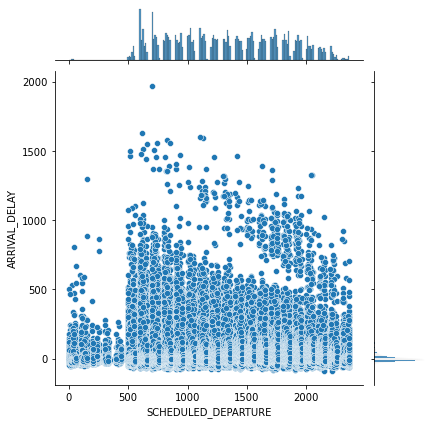

In [16]:
sns.jointplot(data=flights_train, x="SCHEDULED_DEPARTURE", y="ARRIVAL_DELAY")

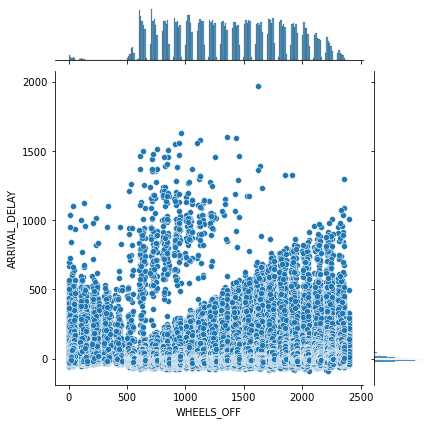

In [17]:
sns.jointplot(data=flights_train, x="WHEELS_OFF", y="ARRIVAL_DELAY")

<AxesSubplot:>

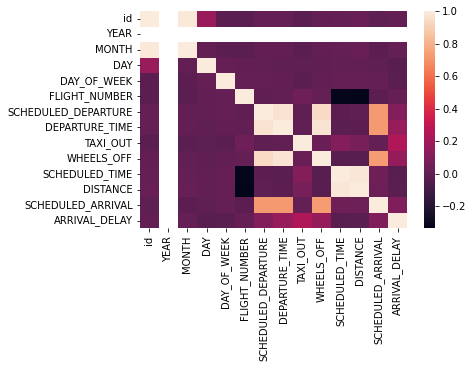

In [19]:
corr = flights_train.corr(method='pearson')
sns.heatmap(corr)

In [20]:
corr

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
id,1.000000,NaN,0.985528,0.173830,-0.013538,-0.022173,0.011027,0.007774,-0.023178,0.005356,0.009609,0.018006,-0.013015,0.006280
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,0.985528,NaN,1.000000,0.006911,-0.016513,-0.023036,0.005989,0.003218,-0.022875,0.000958,0.009965,0.018283,-0.016714,0.008731
DAY,0.173830,NaN,0.006911,1.000000,0.013750,0.002520,-0.001760,-0.004189,-0.008257,-0.004660,-0.000863,-0.000039,-0.003578,-0.024166
DAY_OF_WEEK,-0.013538,NaN,-0.016513,0.013750,1.000000,0.009782,0.008187,0.005875,-0.019184,0.004324,0.015228,0.016583,0.007960,-0.019053
FLIGHT_NUMBER,-0.022173,NaN,-0.023036,0.002520,0.009782,1.000000,-0.004228,0.001510,0.039481,0.007754,-0.322563,-0.337287,-0.015716,0.017728
SCHEDULED_DEPARTURE,0.011027,NaN,0.005989,-0.001760,0.008187,-0.004228,1.000000,0.964189,-0.008020,0.938907,-0.016488,-0.008196,0.718819,0.103083
DEPARTURE_TIME,0.007774,NaN,0.003218,-0.004189,0.005875,0.001510,0.964189,1.000000,0.000728,0.972747,-0.020876,-0.015219,0.721558,0.164384
TAXI_OUT,-0.023178,NaN,-0.022875,-0.008257,-0.019184,0.039481,-0.008020,0.000728,1.000000,0.026827,0.111012,0.069282,0.011364,0.238806
WHEELS_OFF,0.005356,NaN,0.000958,-0.004660,0.004324,0.007754,0.938907,0.972747,0.026827,1.000000,-0.027731,-0.025878,0.731761,0.160181


In [21]:
train_data = flights_train.drop(['id', 'YEAR', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)
# train_data = flights_train.day_name('date', axis=1)
train_data['delayed'] = train_data.apply(delayed_or_not,axis=1)
# train_data['delayed_margin'] = train_data.apply(delayed_margin, axis=1)

display(train_data)




,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day,delayed
0,1,AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday,1
1,1,AA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday,1
2,1,US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday,1
3,1,AA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday,1
4,1,AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,6,UA,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday,1
2818549,6,UA,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday,1
2818550,6,UA,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday,1
2818551,6,UA,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday,1


In [22]:
train_data['delayed'].value_counts(normalize=True)



1    0.977376
0    0.022624
Name: delayed, dtype: float64

In [23]:
train_data['delayed_margin'] = train_data.apply(delayed_margin, axis=1)
display(train_data)



,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day,delayed,delayed_margin
0,1,AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday,1,1
1,1,AA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday,1,0
2,1,US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday,1,0
3,1,AA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday,1,0
4,1,AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,6,UA,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday,1,0
2818549,6,UA,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday,1,1
2818550,6,UA,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday,1,1
2818551,6,UA,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday,1,0


In [24]:
train_data['delayed_margin'].value_counts(normalize=True)



0    0.625915
1    0.374085
Name: delayed_margin, dtype: float64

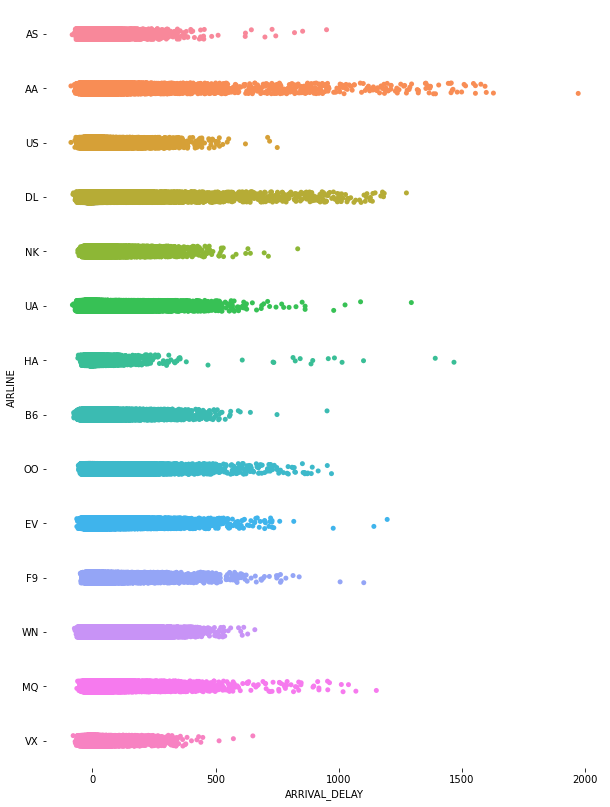

In [25]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = train_data, dodge=True, jitter=True
            )
plt.show()

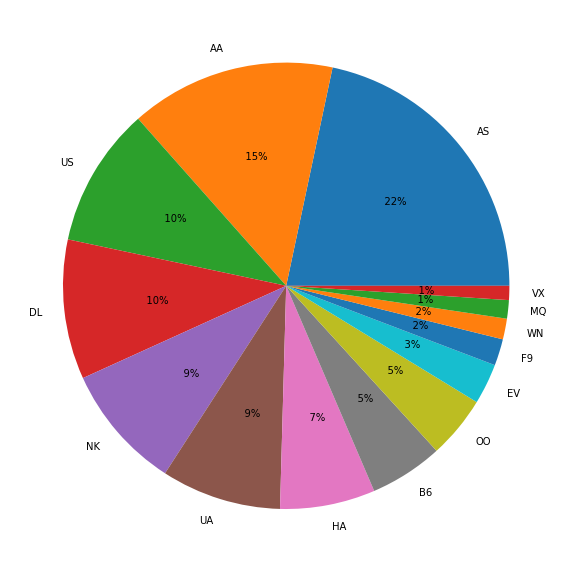

In [26]:
axis = plt.subplots(figsize=(10,14))
Name = train_data["AIRLINE"].unique()
size = train_data["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

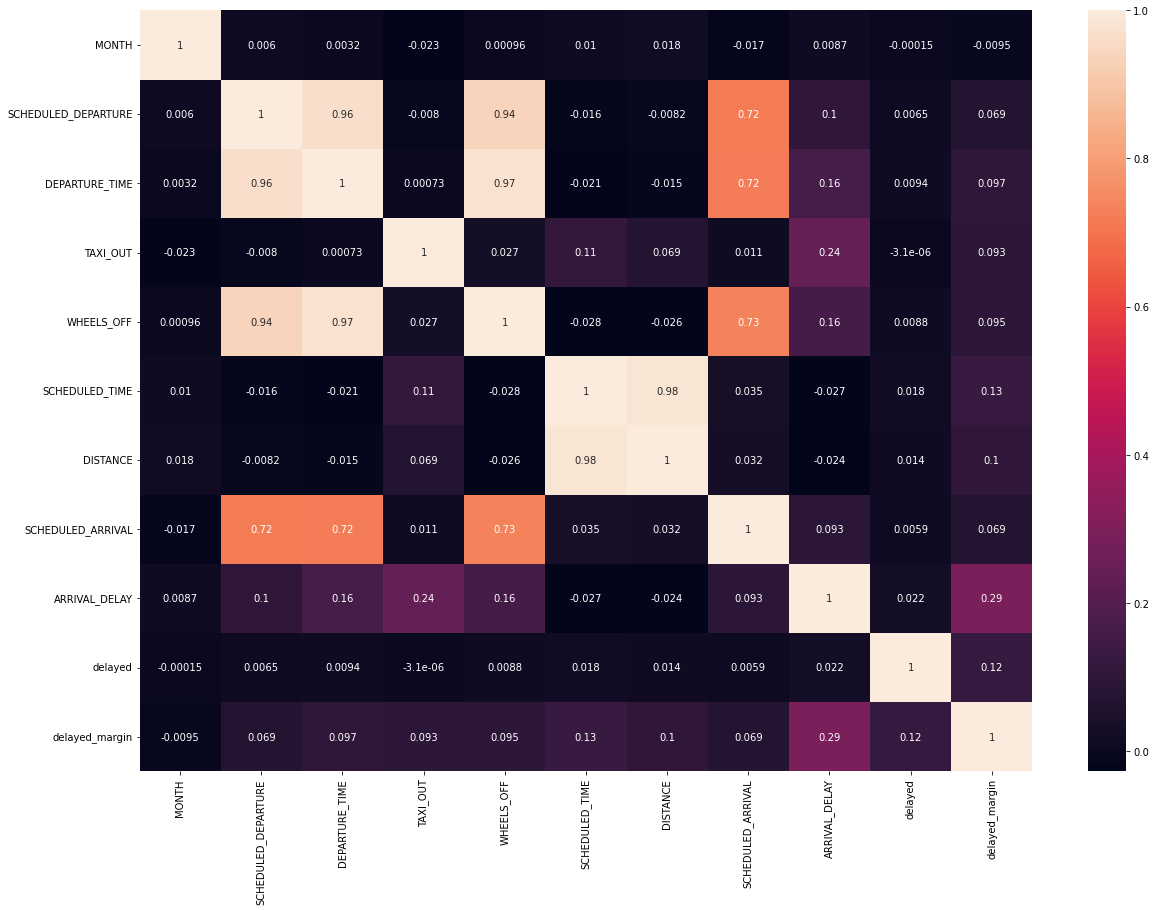

In [27]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [32]:
display(train_data['MONTH'] == 1)

0           True
1           True
2           True
3           True
4           True
           ...  
2818548    False
2818549    False
2818550    False
2818551    False
2818552    False
Name: MONTH, Length: 2818553, dtype: bool

In [36]:
train_jan = train_data.loc[train_data['MONTH'] == 1]
display(train_jan)

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day,delayed,delayed_margin
0,1,AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,Thursday,1,1
1,1,AA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,Thursday,1,0
2,1,US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,Thursday,1,0
3,1,AA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,Thursday,1,0
4,1,AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,Thursday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457008,1,B6,JFK,BQN,2359,2359.0,18.0,17.0,221.0,1576,440,-21.0,2015-01-31,Saturday,1,1
457009,1,DL,SEA,DTW,2359,2359.0,16.0,15.0,252.0,1927,711,-13.0,2015-01-31,Saturday,1,0
457010,1,F9,DEN,TPA,2359,2.0,35.0,37.0,192.0,1506,511,23.0,2015-01-31,Saturday,1,1
457011,1,F9,DEN,ATL,2359,2359.0,40.0,39.0,162.0,1199,441,29.0,2015-01-31,Saturday,1,1


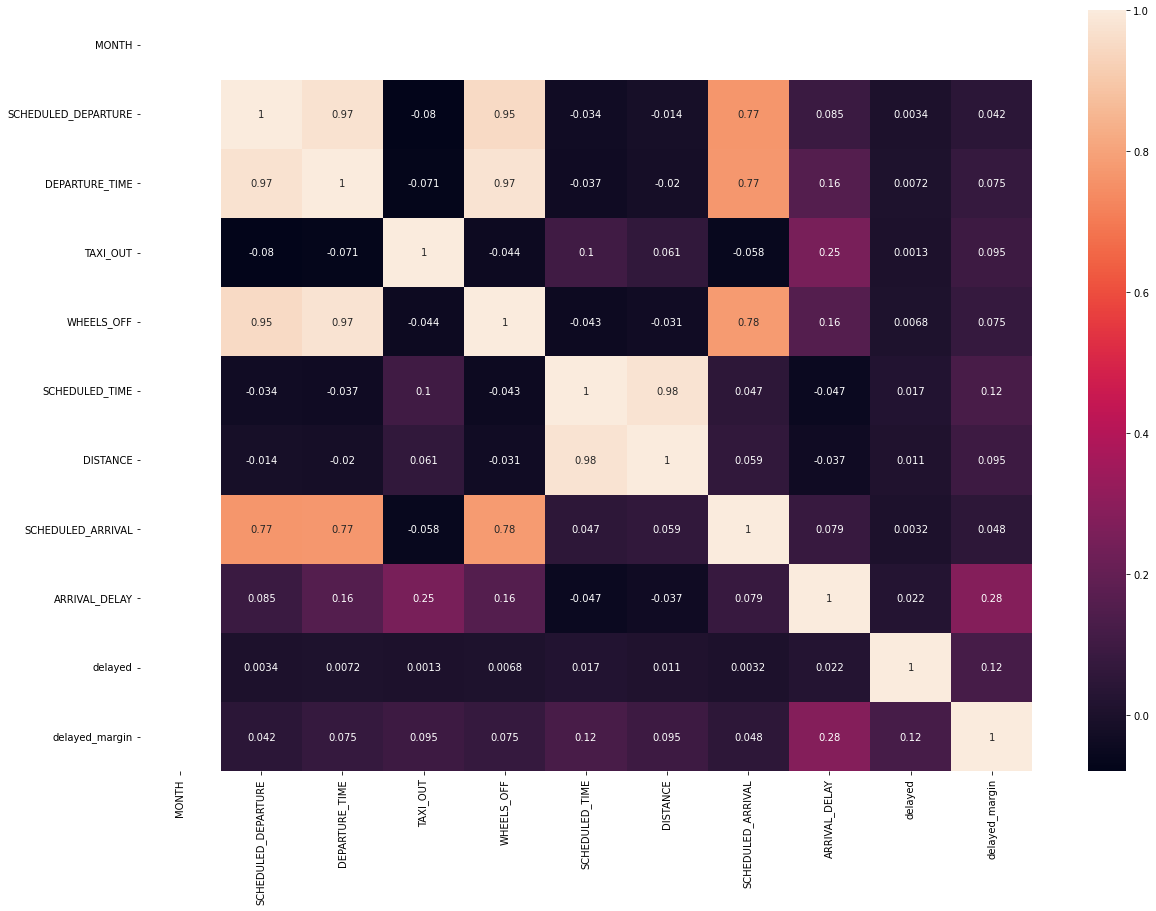

In [37]:
# train_jan = train_data.loc[train_data['MONTH'] == 1]
axis = plt.subplots(figsize=(20,14))
sns.heatmap(train_jan.corr(),annot = True)
plt.show()

In [39]:
train_june = train_data.loc[train_data['MONTH'] == 6]
display(train_june)



,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,date,Day,delayed,delayed_margin
2325706,6,NK,LAS,IAH,10,142.0,17.0,159.0,170.0,1222,500,97.0,2015-06-01,Monday,1,1
2325707,6,AA,SEA,DFW,15,23.0,12.0,35.0,235.0,1660,610,5.0,2015-06-01,Monday,1,0
2325708,6,DL,ANC,SLC,15,11.0,11.0,22.0,277.0,2125,652,-1.0,2015-06-01,Monday,1,0
2325709,6,US,SLC,CLT,15,4.0,12.0,16.0,232.0,1727,607,-22.0,2015-06-01,Monday,1,1
2325710,6,F9,LAS,IAD,15,17.0,13.0,30.0,270.0,2065,745,3.0,2015-06-01,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,6,UA,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,2015-06-30,Tuesday,1,0
2818549,6,UA,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,2015-06-30,Tuesday,1,1
2818550,6,UA,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,2015-06-30,Tuesday,1,1
2818551,6,UA,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,2015-06-30,Tuesday,1,0


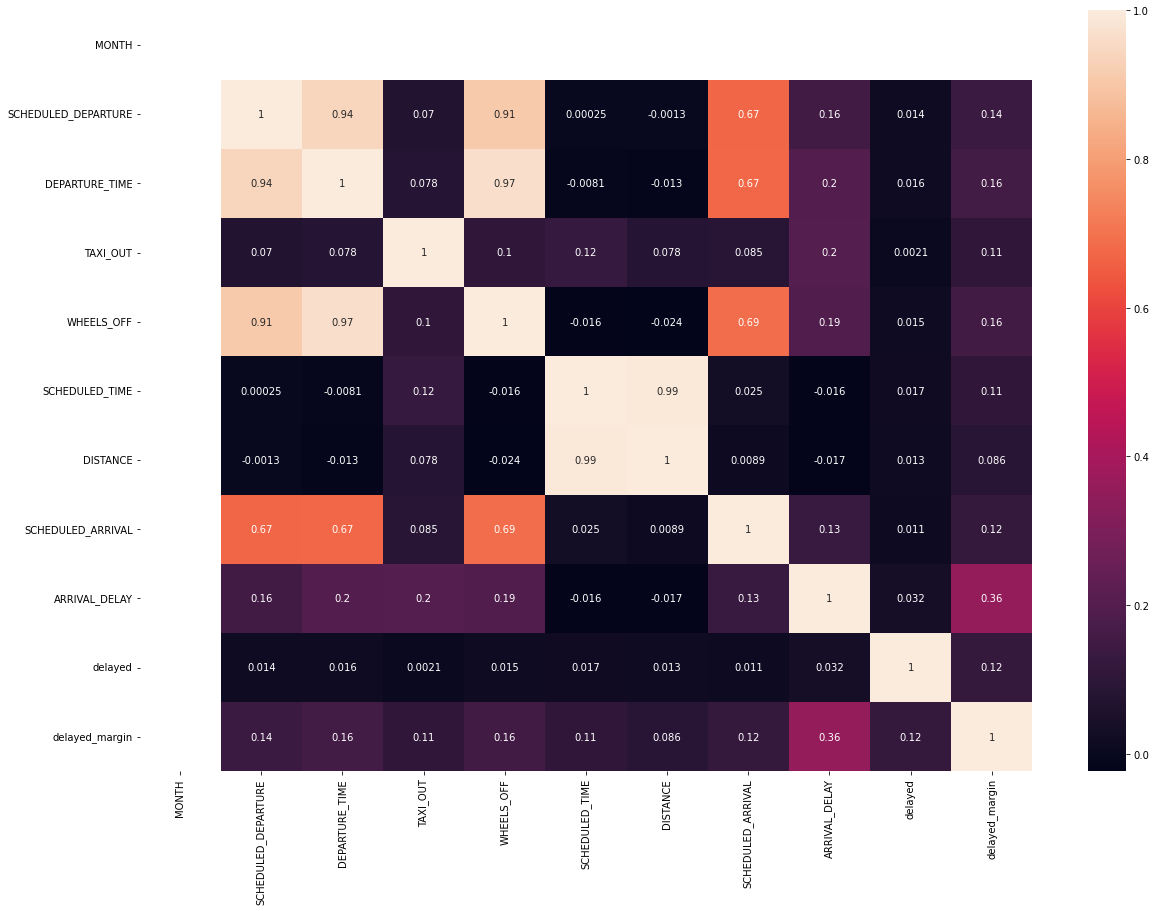

In [40]:
# train_june = train_data.loc[train_data['MONTH'] == 6]
axis = plt.subplots(figsize=(20,14))
sns.heatmap(train_june.corr(),annot = True)
plt.show()

In [50]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
display(airlines)
display(abbr_companies)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [43]:
global_stats = train_data['ARRIVAL_DELAY'].groupby(train_data['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean')
global_stats

,min,max,mean
AIRLINE,,,
AS,-82.0,950.0,-1.104695
DL,-79.0,1274.0,1.694466
HA,-59.0,1467.0,2.402099
US,-87.0,750.0,3.706209
VX,-78.0,651.0,4.712407
WN,-73.0,659.0,5.007338
OO,-57.0,970.0,6.455536
AA,-87.0,1971.0,6.551453
B6,-76.0,952.0,6.968689


In [48]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    list_origin_airport = train_data[train_data['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(list_origin_airport)
display(origin_nb)

{'UA': 88,
 'AA': 85,
 'US': 79,
 'F9': 63,
 'B6': 63,
 'OO': 193,
 'AS': 63,
 'NK': 34,
 'WN': 86,
 'DL': 155,
 'EV': 178,
 'HA': 17,
 'MQ': 128,
 'VX': 19}

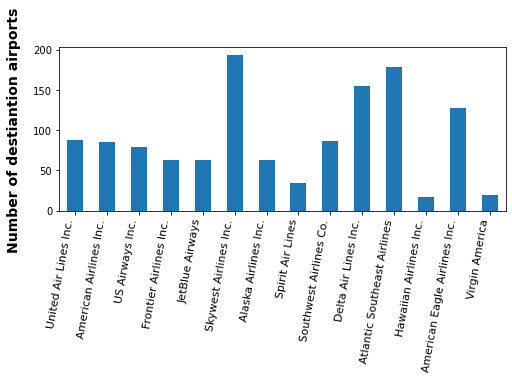

In [47]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of destiantion airports', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [55]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = airports.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = airports.set_index('IATA_CODE')['LONGITUDE'].to_dict()
# display(longitude_airport)

In [58]:
airport_mean_delays = pd.DataFrame(pd.Series(train_data['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    flights1 = train_data[train_data['AIRLINE'] == carrier]
    test = flights1['ARRIVAL_DELAY'].groupby(train_data['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean']

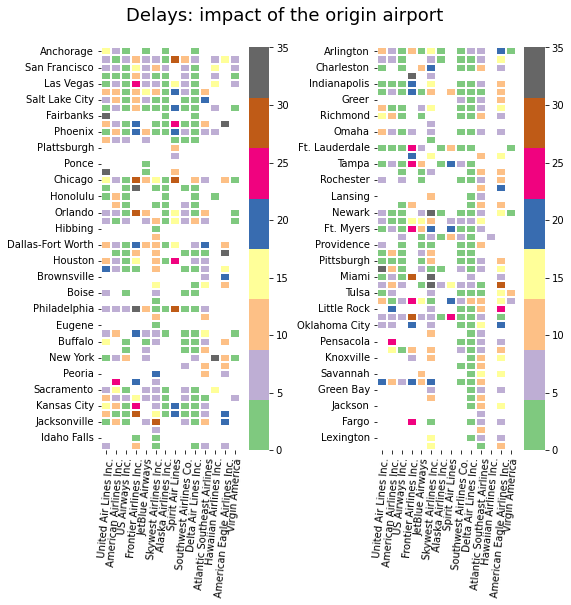

In [59]:
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [63]:
#subset of the dataframe
carrier = 'AA'
flights1 = train_data[train_data['AIRLINE']==carrier][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','ARRIVAL_DELAY']]

#  routes and list the delays for each of them
trajet = dict()
for ind, col in flights1.iterrows():
    if pd.isnull(col['ARRIVAL_DELAY']): continue
    route = str(col['ORIGIN_AIRPORT'])+'-'+str(col['DESTINATION_AIRPORT'])
    if route in trajet.keys():
        trajet[route].append(col['ARRIVAL_DELAY'])
    else:
        trajet[route] = [col['ARRIVAL_DELAY']]
        
# transpose the dictionary in a list to sort the routes by origins        
list_trajet = []
for key, value in trajet.items():
    list_trajet.append([key, value])
list_trajet.sort()

/var/folders/9g/7gb8lzws2hx59zkgz5fd23vm0000gn/T/ipykernel_50521/1048888285.py:16: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_val.append(scipy.mean(trajet2))
/var/folders/9g/7gb8lzws2hx59zkgz5fd23vm0000gn/T/ipykernel_50521/1048888285.py:17: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  std_val.append(scipy.std(trajet2))


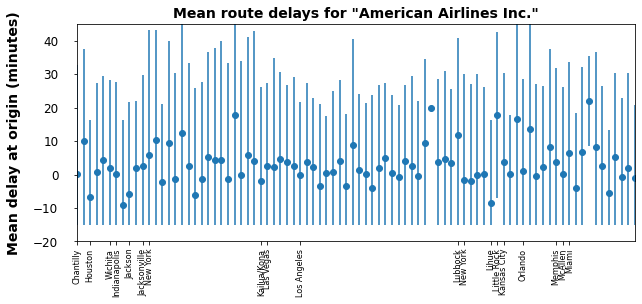

In [65]:
import scipy
from scipy.optimize import curve_fit
mean_val = [] ; std_val = [] ; x_label = []

i = 0
for route, list_retards in list_trajet:
    #_____________________________________________
    # set the labels as the airport from origin
    index = route.split('-')[0]
    x_label.append(identify_airport[index])
    #______________________________________________________________________________
    # put a threshold on delays to prevent that high values take too much weight
    trajet2 = [min(90, s) for s in list_retards]
    #________________________________________
    # compute mean and standard deviations
    mean_val.append(scipy.mean(trajet2))
    std_val.append(scipy.std(trajet2))
    i += 1
#________________
# Plot the graph
fig, ax = plt.subplots(figsize=(10,4))
std_min = [ min(15 + mean_val[i], s) for i,s in enumerate(std_val)] 
ax.errorbar(list(range(i)), mean_val, yerr = [std_min, std_val], fmt='o') 
ax.set_title('Mean route delays for "{}"'.format(abbr_companies[carrier]),
             fontsize=14, weight = 'bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight = 'bold', labelpad=12)
#___________________________________________________
# define the x,y range and positions of the ticks
imin, imax = 145, 230
plt.xlim(imin, imax) ; plt.ylim(-20, 45)
list_ticks = [imin]
for j in range(imin+1,imax):
    if x_label[j] == x_label[j-1]: continue
    list_ticks.append(j)
#_____________________________
# and set the tick parameters  
ax.set_xticks(list_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation = 90, fontsize = 8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()